# Introduction to Data Science - kNN

## Imports

In [24]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap
from pandas import DataFrame
%matplotlib inline

In [3]:
from matplotlib import animation, rc
from IPython.display import HTML

## Load Data

In [32]:
df = pd.read_table('data/anaconda.dat')
df['class'] = [0 if x == 'F' else 1 for x in df['gender']]
df.head()

,snout_length,weight,gender,class
0,271.0,18.5,F,0
1,477.0,82.5,F,0
2,306.3,23.4,F,0
3,365.3,33.5,F,0
4,466.0,69.0,F,0


In [33]:
df.tail()

,snout_length,weight,gender,class
51,228.0,7.53,M,1
52,215.6,5.75,M,1
53,221.0,6.45,M,1
54,236.7,6.49,M,1
55,235.3,6.00,M,1


## Plot It

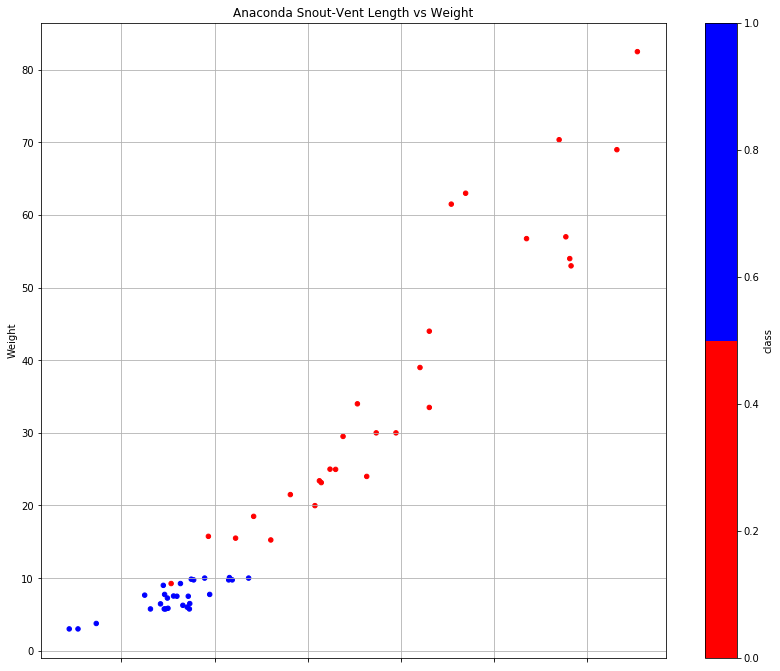

In [56]:
colors = ['red', 'blue']
ax = df.plot.scatter(x='snout_length', y='weight', c='class', cmap=ListedColormap(colors), \
                     figsize=(14, 14), grid = True, legend = True, title='Anaconda Snout-Vent Length vs Weight')
ax.set_xlabel('Snout-Vent Length')
ax.set_ylabel('Weight')
ax.get_figure().subplots_adjust(bottom=0.25)
plt.show()

## Plotting Decision Boundaries

In [65]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

data = np.array([df['snout_length'], df['weight'], df['class']]).T
np.random.shuffle(data)

X = data[:-test_size, 0:2]
y = np.array(data[:-test_size, 2])

h = 1
# Generate mesh values
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

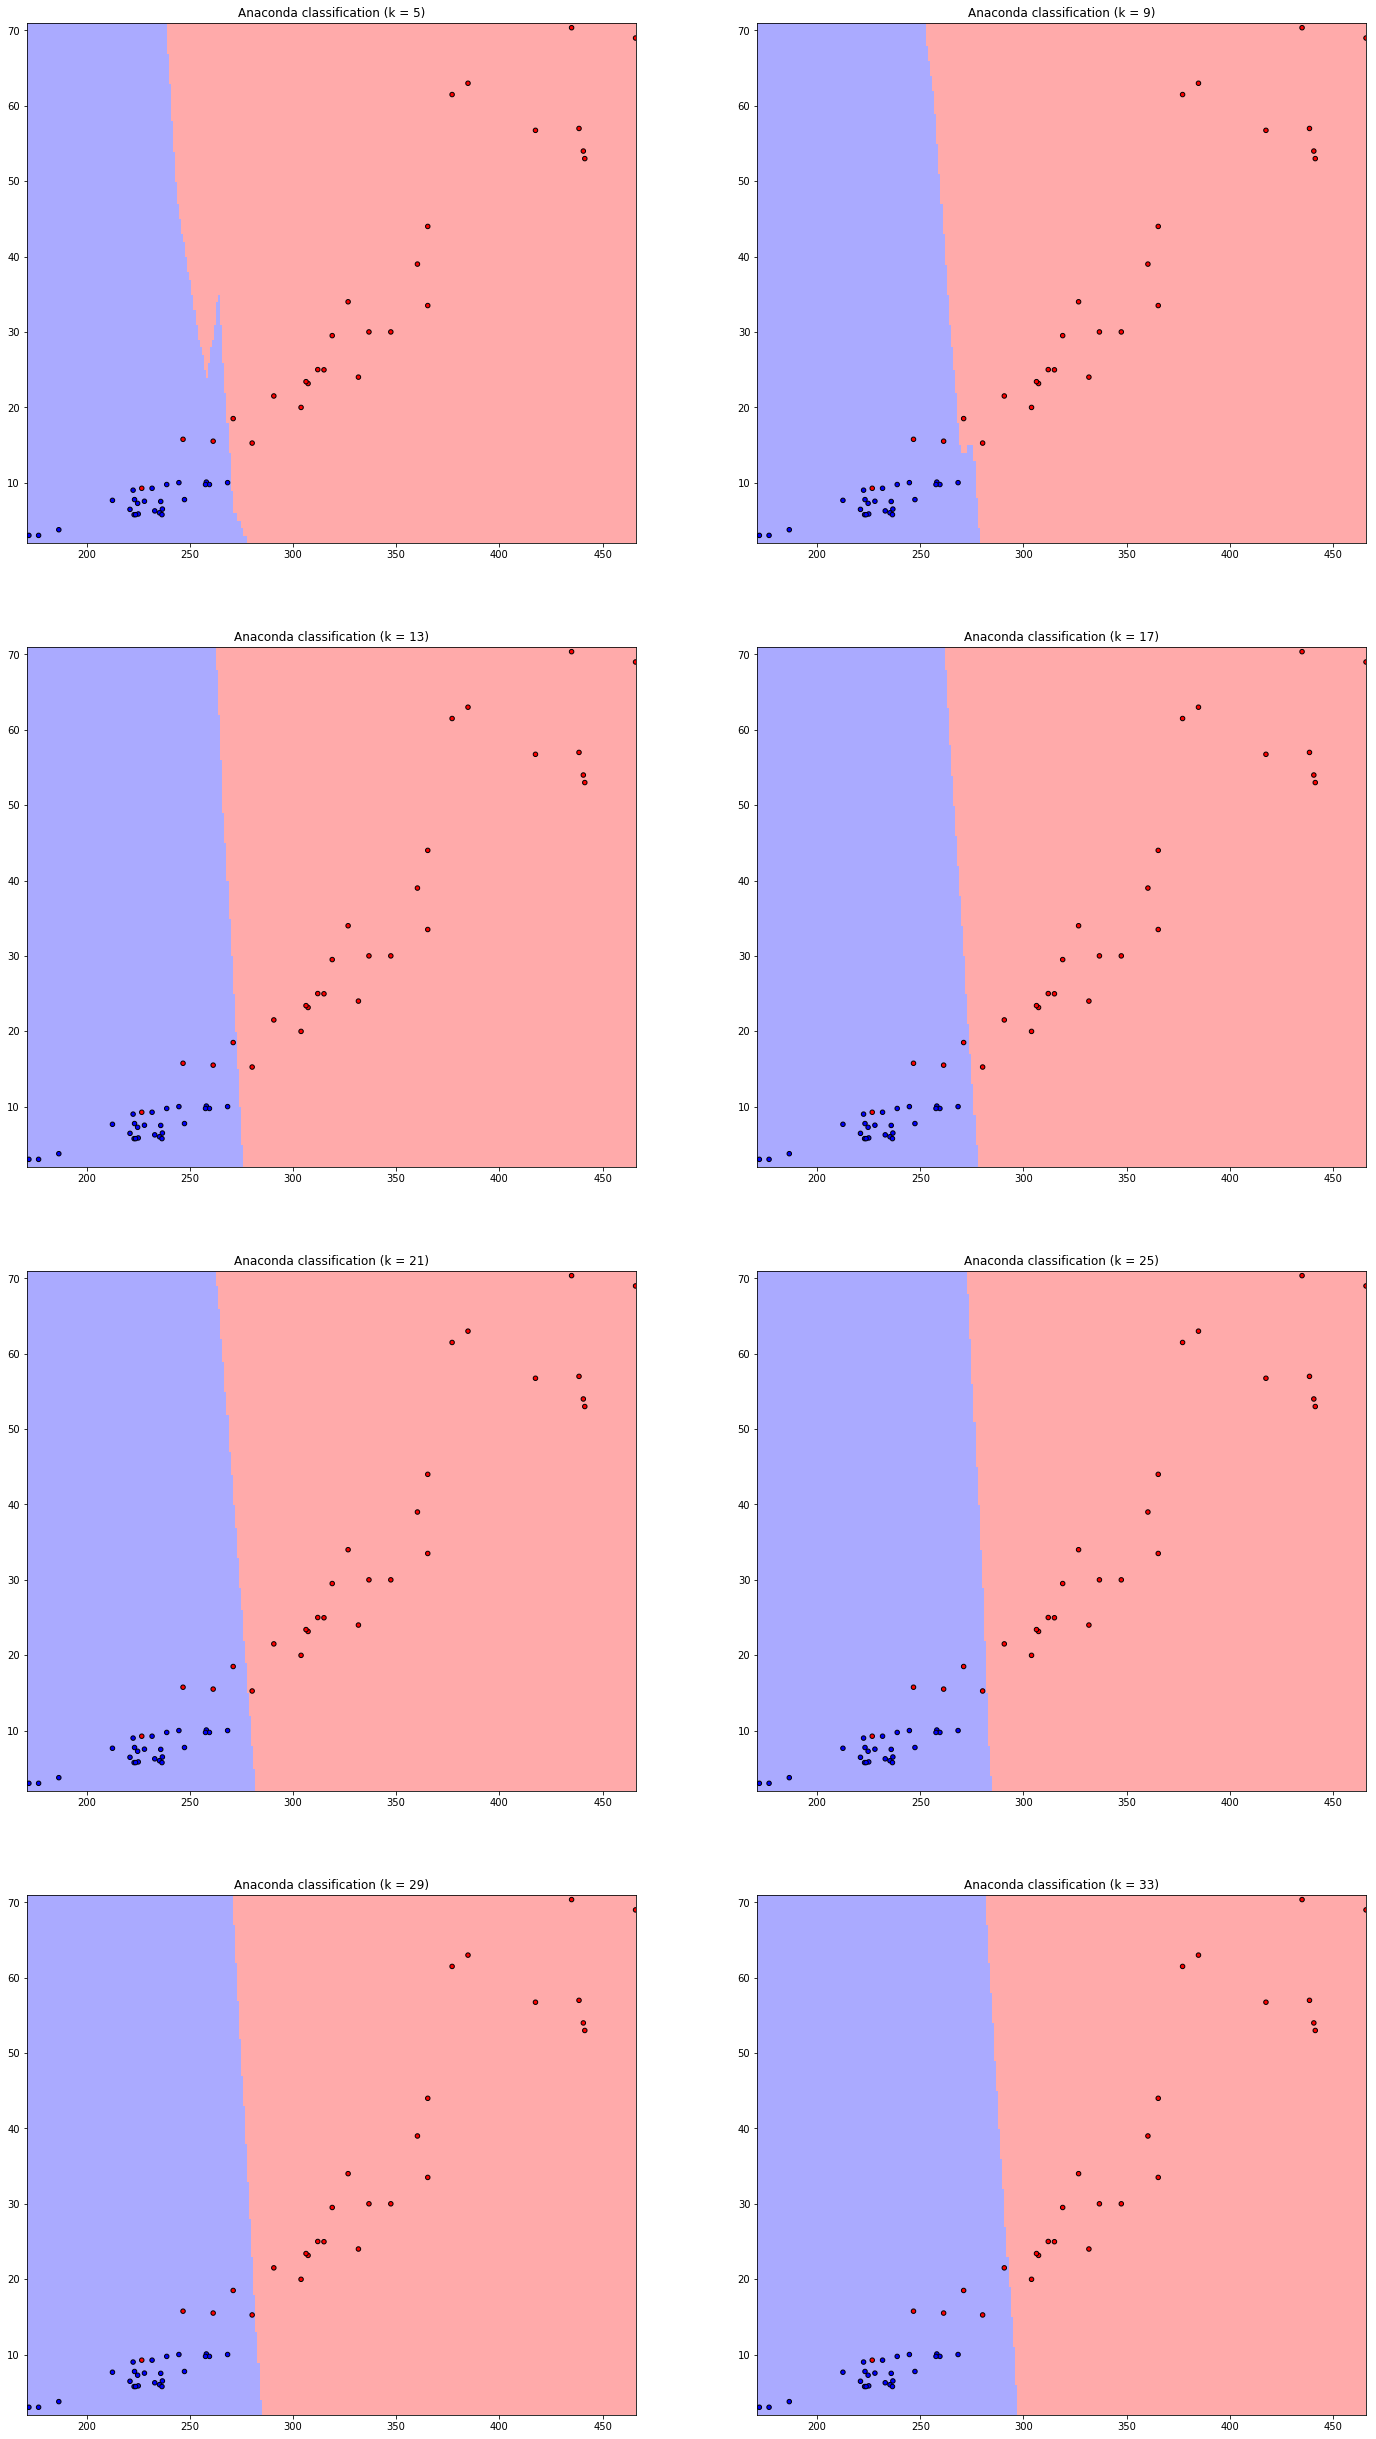

In [67]:
# fig, ax = plt.subplots(nrows=2, ncols=4)
fig = plt.figure(figsize=(24, 44))

cnt = 1
for num_neigh in range(5, 35, 4):
    clf = neighbors.KNeighborsClassifier(num_neigh, weights='uniform')
    clf.fit(X, y)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.subplot(4, 2, cnt)
#     plt.figure(2, 4, cnt)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Anaconda classification (k = {})".format(num_neigh))
    cnt += 1

plt.show()